# Синтаксический анализ

В этом ноутбуке демонстрируются синтаксические парсеры из библиотек `spaCy`, `Stanza` и `Natasha`.

### Содержание
1. [Синтаксические парсеры](#Синтаксические-парсеры)
    - [Universal Dependencies](#Universal-Dependencies)
    - [Тексты для анализа](#Тексты-для-анализа)
1. [spaCy](#spaCy)
1. [Stanza](#Stanza)
1. [Natasha](#Natasha)
1. [Сравнение](#Сравнение)

## Синтаксические парсеры
Синтаксические парсеры строят синтаксические деревья зависимостей (*dependency trees*).
* [Daniel Jurafsky & James H. Martin. Speech and Language Processing. Draft (2020). Chapter 14. Dependency Parsing](https://web.stanford.edu/~jurafsky/slp3/14.pdf)

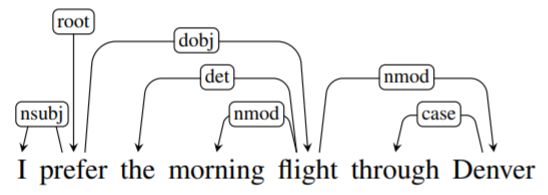

У дерева есть корень (*root*) – как правило, сказуемое.  
Типы синтаксических отношений между узлами дерева часто описываются при помощи соглашений, принятых в проекте *Universal Dependencies*.

### Universal Dependencies
[Universal Dependencies](https://universaldependencies.org) (универсальные зависимости) – проект, направленный на разработку единообразного описания грамматических характеристик для текстов на разных языках.  
Для синтаксических связей используются следующие основные обозначения (некоторым отношениям сложно сопоставить короткие аналоги в русской грамматике, но по ссылкам имеются примеры):
- `nsubj` – подлежащее (*nominal subject*) ([nsubj](https://universaldependencies.org/ru/dep/nsubj.html))
- `csubj` – клаузальное подлежащее (*clausal subject*) ([csubj](https://universaldependencies.org/ru/dep/csubj.html))
- `obj` – прямое дополнение (*direct object*) ([obj](https://universaldependencies.org/ru/dep/obj.html))
- `iobj` – косвенное дополнение (*indirect object*) ([iobj](https://universaldependencies.org/ru/dep/iobj.html))
- `ccomp` – клаузальное дополнение (*clausal complement*) ([ccomp](https://universaldependencies.org/ru/dep/ccomp.html))
- `xcomp` – открытое клаузальное дополнение (*open clausal complement*) ([xcomp](https://universaldependencies.org/ru/dep/xcomp.html))
- `acl` – клаузальное дополнение (*clausal modifier of nominal*) ([acl](https://universaldependencies.org/ru/dep/acl.html))
- `advcl` – клаузальное обстоятельство (*adverbial clause modifier*) ([advcl](https://universaldependencies.org/ru/dep/advcl.html))
- `cop` – глагол-связка (*copula*) ([cop](https://universaldependencies.org/ru/dep/cop.html))
- `aux` – вспомогательный глагол (*auxiliary*) ([aux](https://universaldependencies.org/ru/dep/aux_.html))
- `amod` – определение (*adjectival modifier*) ([amod](https://universaldependencies.org/ru/dep/amod.html))
- `advmod` – наречие-обстоятельство (*adverbial modifier*) ([advmod](https://universaldependencies.org/ru/dep/advmod.html))
- `nummod` – числительное (*numeric modifier*) ([nummod](https://universaldependencies.org/ru/dep/nummod.html))
- `det` – местоименное прилагательное (*determiner*) ([det](https://universaldependencies.org/ru/dep/det.html))
- `conj` – сочинительный союз (*conjunct*) ([conj](https://universaldependencies.org/ru/dep/conj.html))
- `case` – предлог (*case marking*) ([case](https://universaldependencies.org/ru/dep/case.html))
- `fixed`, `flat`, `compound` – устойчивые словосочетания (*multiword expressions*) ([fixed](https://universaldependencies.org/ru/dep/fixed.html), [flat](https://universaldependencies.org/ru/dep/flat.html), [compound](https://universaldependencies.org/ru/dep/compound.html))
- `punct` – знак пунктуации (*punctuation*) ([punct](https://universaldependencies.org/ru/dep/punct.html))


Полный список обозначений можно посмотреть [здесь](https://universaldependencies.org/ru/index.html#syntax).  
Также можно прочитать статью:
- [Люкина Е.В. Использование универсальных зависимостей при грамматическом разборе многоязычного текста (2018)](https://lingngu.elpub.ru/jour/article/view/15).  

Список русскоязычных частей речи в Universal Dependencies доступен [здесь](https://universaldependencies.org/ru/pos).

### Тексты для анализа

In [103]:
texts = [
    'В лесу родилась ёлочка, в лесу она росла.',
    'Простое предложение',
    'Одно простое предложение и второе простое предложение.',
    'Я всегда прихожу на пары вовремя, но не в этот четверг.',
    'Мама мыла раму',
    'Никогда не говори "Никогда"',
    'Как тебе такое, Илон Маск?',
    'У меня все друзья решили сюда прийти еще не раз.' 
]

In [104]:
text = texts[0]

In [105]:
# Вспомогательные функции для вывода результатов

def print_heading(max_length, prefix=''):
    '''
    Функция для вывода заголовка таблицы результатов.
        max_length - максимальная длина токенов,
        prefix - строка для вывода в начале
    '''
    if max_length < 10:
        max_length = 10
    else:
        max_length += 2
        
    print(f'{prefix}{"ID токена":11}{"Токен":{max_length}}{"ID родителя":13}{"Родитель":{max_length}}{"Связь":10}\n')

def print_token_result(token, token_id, parent, parent_id, dep, max_length=10, prefix=''):
    '''
    Функция для вывода результатов анализа для токена
        token - анализируемый токен,
        token_id - ID токена,
        parent - родитель токена,
        parent_id - ID родителя,
        dep - тип связи токена с родителем,
        max_length - максимальная длина токенов,
        prefix - строка для вывода в начале
    '''
    if max_length < 10:
        max_length = 10
    else:
        max_length += 2
    
    print(f'{prefix}{str(token_id):11}{token:{max_length}}{str(parent_id):13}{parent:{max_length}}{dep:10}')

## spaCy
Русскоязычные [модели](https://spacy.io/models/ru) в spaCy:
- `ru_core_news_sm` (16 MB) – small
- `ru_core_news_md` (41 MB) – medium
- `ru_core_news_lg` (491 MB) – large

Установка: `python -m spacy download ru_core_news_sm`

Справка по синтаксическому парсеру: [ссылка](https://spacy.io/usage/linguistic-features#navigating).

In [106]:
import spacy
from spacy import displacy

In [107]:
spacy_model_name = 'ru_core_news_sm'
# spacy_model_name = 'ru_core_news_md'
# spacy_model_name = 'ru_core_news_lg'

In [108]:
nlp_spacy = spacy.load(spacy_model_name)

Для каждого токена (узла дерева зависимостей) `spaCy` возвращает его родителя, тип связи с родителем и список детей.  
Для токена-сказуемого родителем будет являться сам токен, а тип связи – `ROOT`:

In [109]:
doc_spacy = nlp_spacy(text)

In [110]:
# Находим максимальную длину токенов - для удобного вывода
max_length = max([len(token) for token in doc_spacy])
print_heading(max_length)

for token in doc_spacy:
    print_token_result(
        token_id=token.i+1,
        token=token.text,
        parent_id=token.head.i+1,
        parent=token.head.text,
        dep=token.dep_,
        max_length=max_length
    )

ID токена  Токен     ID родителя  Родитель  Связь     

1          В         2            лесу      case      
2          лесу      3            родилась  obl       
3          родилась  3            родилась  ROOT      
4          ёлочка    3            родилась  nsubj     
5          ,         9            росла     punct     
6          в         7            лесу      case      
7          лесу      9            росла     obl       
8          она       9            росла     nsubj     
9          росла     3            родилась  conj      
10         .         3            родилась  punct     


---
Построенное дерево можно визуализировать:

In [111]:
displacy.render(doc_spacy, style='dep')

---
Путем итерации по токенам можно искать необходимые связи. Пусть, например, нужно найти подлежащее (`nsubj`), родителем которого является глагол (`VERB`):

In [112]:
for token in doc_spacy:
    if token.dep_ == 'nsubj' and token.head.pos_ == 'VERB':
        print(f'Подлежащее: {token}')

Подлежащее: ёлочка
Подлежащее: она


---
Можно вывести непосредственных детей узла, которые находятся слева и справа в предложении:

In [113]:
for token in doc_spacy:
    lefts = [t.text for t in token.lefts]
    rights = [t.text for t in token.rights]
    print(f'{token}:\tlefts ({token.n_lefts}) - {lefts}, rights ({token.n_rights}) - {rights}')

В:	lefts (0) - [], rights (0) - []
лесу:	lefts (1) - ['В'], rights (0) - []
родилась:	lefts (1) - ['лесу'], rights (3) - ['ёлочка', 'росла', '.']
ёлочка:	lefts (0) - [], rights (0) - []
,:	lefts (0) - [], rights (0) - []
в:	lefts (0) - [], rights (0) - []
лесу:	lefts (1) - ['в'], rights (0) - []
она:	lefts (0) - [], rights (0) - []
росла:	lefts (3) - [',', 'лесу', 'она'], rights (0) - []
.:	lefts (0) - [], rights (0) - []


---
Можно вывести всех родителей и детей узла:

In [114]:
for token in doc_spacy:
    ancestors = [t for t in token.ancestors]
    children = [t for t in token.children]
    print(f'{token}:\t{ancestors}\t{children}')

В:	[лесу, родилась]	[]
лесу:	[родилась]	[В]
родилась:	[]	[лесу, ёлочка, росла, .]
ёлочка:	[родилась]	[]
,:	[росла, родилась]	[]
в:	[лесу, росла, родилась]	[]
лесу:	[росла, родилась]	[в]
она:	[росла, родилась]	[]
росла:	[родилась]	[,, лесу, она]
.:	[родилась]	[]


## Stanza
В `Stanza` [синтаксический парсер](https://stanfordnlp.github.io/stanza/depparse.html) реализован в классе `DepparseProcessor` и вызывается с использованием ключевого слова `depparse`.  
До вызова синтаксического парсера должны быть вызваны обработчики (processors):
- `TokenizeProcessor` (`tokenize`)
- `POSProcessor` (`pos`)
- `LemmaProcessor` (`lemma`)

In [115]:
import stanza

In [116]:
nlp_stanza = stanza.Pipeline(lang='ru', processors='tokenize,pos,lemma,depparse')

2021-05-17 20:52:59 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |

2021-05-17 20:52:59 INFO: Use device: gpu
2021-05-17 20:52:59 INFO: Loading: tokenize
2021-05-17 20:53:00 INFO: Loading: pos
2021-05-17 20:53:00 INFO: Loading: lemma
2021-05-17 20:53:00 INFO: Loading: depparse
2021-05-17 20:53:00 INFO: Done loading processors!


In [117]:
doc_stanza = nlp_stanza(text)

In [118]:
max_length = max([len(word.text) for sent in doc_stanza.sentences for word in sent.words])
print_heading(max_length)

for sent in doc_stanza.sentences:
    for word in sent.words:
        head = sent.words[word.head-1].text if word.head > 0 else 'root'
        print_token_result(token_id=word.id, token=word.text, parent_id=word.head, parent=head, dep=word.deprel, max_length=max_length)

ID токена  Токен     ID родителя  Родитель  Связь     

1          В         2            лесу      case      
2          лесу      3            родилась  obl       
3          родилась  0            root      root      
4          ёлочка    3            родилась  nsubj     
5          ,         9            росла     punct     
6          в         7            лесу      case      
7          лесу      9            росла     obl       
8          она       9            росла     nsubj     
9          росла     3            родилась  conj      
10         .         3            родилась  punct     


## Natasha
Проект `Natasha` содержит библиотеки и компоненты для решения базовых задач обработки русского языка: сегментация на токены и предложения, морфологический и синтаксический анализ, извлечение именованных сущностей:
* [Github](https://natasha.github.io)
* [Статья на Хабре](https://habr.com/ru/post/516098/)
* [Инструкция по установке](https://github.com/natasha/natasha#install)

In [119]:
from ipymarkup import show_dep_ascii_markup as show_markup
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax

Синтаксический анализ реализован в библиотеке `SlovNet` ([Github](https://github.com/natasha/slovnet)).  
Предварительно требуется скачать файл модели для синтаксиса и поместить его в папку с ноутбуком:
- [slovnet_syntax_news_v1.tar](https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_syntax_news_v1.tar) (2.5 MB).

In [120]:
syntax_natasha = Syntax.load('slovnet_syntax_news_v1.tar')

---
Также для синтаксического анализа потребуется [Navec](https://github.com/natasha/navec) – библиотека предобученных эмбеддингов для русского языка.  
Доступны [две модели](https://github.com/natasha/navec#downloads):
- [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) (50 MB) – обучена на литературном корпусе с librusec (150 Гб); предлагается использовать по умолчанию.
- [navec_news_v1_1B_250K_300d_100q](https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar) (25 MB) – обучена на новостном корпусе.

Модели нужно предварительно скачать и поместить в папку с ноутбуком:

In [121]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
# navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [122]:
syntax_natasha.navec(navec);

Перед синтаксическим анализом необходимо осуществить сегментацию текста на предложения и токенизацию:

In [123]:
chunks = []
for sent in sentenize(text):
    tokens = [_.text for _ in tokenize(sent.text)]
    chunks.append(tokens)
print(f'Количество предложений: {len(chunks)}')
print(f'Токены первого предложения: {chunks[0]}')

Количество предложений: 1
Токены первого предложения: ['В', 'лесу', 'родилась', 'ёлочка', ',', 'в', 'лесу', 'она', 'росла', '.']


---
Осуществляем синтаксический анализ:

In [124]:
markup = next(syntax_natasha.map(chunks))

In [125]:
max_length = max([len(token.text) for token in markup.tokens])
print_heading(max_length)

for token in markup.tokens:
    head = markup.tokens[int(token.head_id)-1].text if int(token.head_id) > 0 else 'root'
    print_token_result(token_id=token.id, token=token.text, parent_id=token.head_id, parent=head, dep=token.rel, max_length=max_length)

ID токена  Токен     ID родителя  Родитель  Связь     

1          В         2            лесу      case      
2          лесу      3            родилась  obl       
3          родилась  0            root      root      
4          ёлочка    3            родилась  nsubj     
5          ,         9            росла     punct     
6          в         7            лесу      case      
7          лесу      9            росла     obl       
8          она       9            росла     nsubj     
9          росла     3            родилась  conj      
10         .         3            родилась  punct     


---
Для удобного представления результатов можно воспользоваться библиотекой визуализации [`Ipymarkup`](https://github.com/natasha/ipymarkup):

In [126]:
words, deps = [], []
for token in markup.tokens:
    words.append(token.text)
    source = int(token.head_id) - 1
    target = int(token.id) - 1
    if source >= 0 and source != target:  # skip root, loops
        deps.append([source, target, token.rel])
show_markup(words, deps)

        ┌► В        case
      ┌►└─ лесу     obl
┌─┌───└─┌─ родилась 
│ │     └► ёлочка   nsubj
│ │ ┌────► ,        punct
│ │ │   ┌► в        case
│ │ │ ┌►└─ лесу     obl
│ │ │ │ ┌► она      nsubj
│ └►└─└─└─ росла    conj
└────────► .        punct


## Сравнение
Авторы проекта `Natasha` проводили [сравнение](https://github.com/natasha/naeval#syntax-parser) синтаксических парсеров на разных корпусах.  

В этом разделе приводятся результаты парсеров на разных примерах:

In [127]:
for text in texts:

    print(f'{text}\n')
    
    # spaCy
    
    print('\tspaCy:')
    doc_spacy = nlp_spacy(text)

    max_length = max([len(token) for token in doc_spacy])
    print_heading(max_length, prefix='\t')

    for token in doc_spacy:
        print_token_result(token_id=token.i+1, token=token.text, parent_id=token.head.i+1, parent=token.head.text, dep=token.dep_, max_length=max_length, prefix='\t')
        
    print('\n')
        
    # Stanza
    
    print('\tstanza:')
    doc_stanza = nlp_stanza(text)
    
    max_length = max([len(word.text) for sent in doc_stanza.sentences for word in sent.words])
    print_heading(max_length, prefix='\t')

    for sent in doc_stanza.sentences:
        for word in sent.words:
            head = sent.words[word.head-1].text if word.head > 0 else 'root'
            print_token_result(token_id=word.id, token=word.text, parent_id=word.head, parent=head, dep=word.deprel, max_length=max_length, prefix='\t')
            
    print('\n')
    
    # Natasha
    
    print('\tNatasha:')
    
    chunks = []
    for sent in sentenize(text):
        tokens = [_.text for _ in tokenize(sent.text)]
        chunks.append(tokens)
    
    markup = next(syntax_natasha.map(chunks))
    
    max_length = max([len(token.text) for token in markup.tokens])
    print_heading(max_length, prefix='\t')

    for token in markup.tokens:
        head = markup.tokens[int(token.head_id)-1].text if int(token.head_id) > 0 else 'root'
        print_token_result(token_id=token.id, token=token.text, parent_id=token.head_id, parent=head, dep=token.rel, max_length=max_length, prefix='\t')
    
    print('\n')
        
    print('-----------------------------------------------------------------------')

В лесу родилась ёлочка, в лесу она росла.

	spaCy:
	ID токена  Токен     ID родителя  Родитель  Связь     

	1          В         2            лесу      case      
	2          лесу      3            родилась  obl       
	3          родилась  3            родилась  ROOT      
	4          ёлочка    3            родилась  nsubj     
	5          ,         9            росла     punct     
	6          в         7            лесу      case      
	7          лесу      9            росла     obl       
	8          она       9            росла     nsubj     
	9          росла     3            родилась  conj      
	10         .         3            родилась  punct     


	stanza:
	ID токена  Токен     ID родителя  Родитель  Связь     

	1          В         2            лесу      case      
	2          лесу      3            родилась  obl       
	3          родилась  0            root      root      
	4          ёлочка    3            родилась  nsubj     
	5          ,         9            росла